<a href="https://colab.research.google.com/github/atikhasan007/DeepLearning/blob/main/cnn_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns   # optional for nicer confusion matrix (not required)
import pandas as pd

In [2]:
! ls

sample_data


In [3]:
# load data MNIST

(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print("Train shape:", x_train.shape, "Test shape:", x_test.shape)
print("Class distribution (train):", np.bincount(y_train))

Train shape: (60000, 28, 28) Test shape: (10000, 28, 28)
Class distribution (train): [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


In [8]:
#preprocess -> reshape and normalize
x_train = x_train.reshape(-1, 28, 28, 1)
x_train = x_train.astype("float32")/255.0
x_train.shape

(60000, 28, 28, 1)

In [9]:
x_test = x_test.reshape(-1,28,28,1).astype("float32")/255.0
x_test.shape

(10000, 28, 28, 1)

In [13]:
#one hot encode labels
y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

print(y_train_cat.shape)
print(y_test_cat.shape)

(60000, 10)
(10000, 10)


| Layer            | Filters | Detects                  |
| ---------------- | ------- | ------------------------ |
| Conv1            | 32      | Simple edges, corners    |
| Conv2            | 64      | Complex shapes, patterns |
| Conv3 (optional) | 128+    | Object-level features    |


In [26]:
#Build CNN model
#conv2d ইমেজ থেকে ফিচার বের করা # 32 filter , 64 filter / kernerl
#CNN এই layer-এ 32টা filter/kernel ব্যবহার করবে।
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),

    MaxPooling2D((2,2)),

   # CNN এই layer-এ 64 টা filter/kernel ব্যবহার করবে।

    Conv2D(64, (3,3), activation='relu'),

    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| Layer Type   | Filters/Neurons | Kernel Size | Activation | Output Shape |
| ------------ | --------------- | ----------- | ---------- | ------------ |
| Conv2D       | 32              | 3×3         | ReLU       | 26×26×32     |
| MaxPooling2D | —               | 2×2         | —          | 13×13×32     |
| Conv2D       | 64              | 3×3         | ReLU       | 11×11×64     |
| MaxPooling2D | —               | 2×2         | —          | 5×5×64       |
| Flatten      | —               | —           | —          | 1600         |
| Dense        | 128             | —           | ReLU       | 128          |
| Dropout      | 0.4             | —           | —          | —            |
| Dense        | 10              | —           | Softmax    | 10           |


In [15]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
 #-------------------------
# 4) Train
# -------------------------
history = model.fit(x_train, y_train_cat,
                    validation_split=0.1,
                    epochs=25,        # demo: 5 epochs; নকশা হিসেবে 10-20 দিনো ভালো
                    batch_size=128,
                    verbose=2)


Epoch 1/25
422/422 - 50s - 120ms/step - accuracy: 0.6059 - loss: 1.1720 - val_accuracy: 0.9018 - val_loss: 0.3430
Epoch 2/25
422/422 - 46s - 109ms/step - accuracy: 0.8708 - loss: 0.4198 - val_accuracy: 0.9412 - val_loss: 0.2035
Epoch 3/25
422/422 - 65s - 154ms/step - accuracy: 0.9089 - loss: 0.2988 - val_accuracy: 0.9587 - val_loss: 0.1428
Epoch 4/25
422/422 - 65s - 153ms/step - accuracy: 0.9312 - loss: 0.2293 - val_accuracy: 0.9668 - val_loss: 0.1147
Epoch 5/25
422/422 - 77s - 183ms/step - accuracy: 0.9444 - loss: 0.1868 - val_accuracy: 0.9742 - val_loss: 0.0930
Epoch 6/25
422/422 - 81s - 191ms/step - accuracy: 0.9526 - loss: 0.1585 - val_accuracy: 0.9763 - val_loss: 0.0831
Epoch 7/25
422/422 - 42s - 99ms/step - accuracy: 0.9563 - loss: 0.1448 - val_accuracy: 0.9762 - val_loss: 0.0769
Epoch 8/25
422/422 - 43s - 102ms/step - accuracy: 0.9611 - loss: 0.1276 - val_accuracy: 0.9778 - val_loss: 0.0761
Epoch 9/25
422/422 - 80s - 190ms/step - accuracy: 0.9636 - loss: 0.1208 - val_accuracy: 0

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test loss: {test_loss:.4f} | Test accuracy: {test_acc:.4f}")


Test loss: 47.0328 | Test accuracy: 0.9269


In [18]:
# predictions
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [20]:
# classification report
report = classification_report(y_test, y_pred, digits=4)
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0     0.9567    0.9918    0.9739       980
           1     0.8239    0.9974    0.9024      1135
           2     0.9618    0.9525    0.9572      1032
           3     0.9771    0.9723    0.9747      1010
           4     0.9698    0.9470    0.9583       982
           5     0.9346    0.9776    0.9556       892
           6     0.9650    0.9791    0.9720       958
           7     0.8011    0.9796    0.8814      1028
           8     0.9956    0.7043    0.8250       974
           9     0.9922    0.7602    0.8608      1009

    accuracy                         0.9269     10000
   macro avg     0.9378    0.9262    0.9261     10000
weighted avg     0.9357    0.9269    0.9254     10000



In [21]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[ 972    3    0    0    0    0    2    2    0    1]
 [   0 1132    2    0    0    0    0    1    0    0]
 [   7   19  983    0    7    0    0   15    0    1]
 [   0    0    6  982    0    8    0   11    2    1]
 [   1   40    0    0  930    0    2    7    0    2]
 [   5    2    1    5    1  872    3    3    0    0]
 [   7    6    0    0    5    2  938    0    0    0]
 [   0   12    8    0    0    0    0 1007    1    0]
 [  20  120   21   11    8   45   27   35  686    1]
 [   4   40    1    7    8    6    0  176    0  767]]


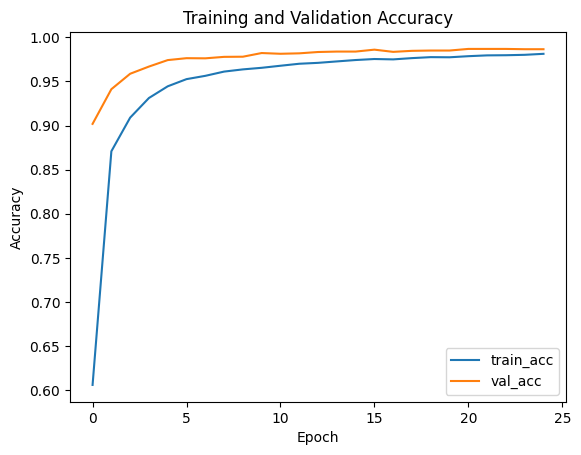

In [22]:
# -------------------------
# 6) Plots: accuracy & loss & confusion matrix
# -------------------------
# Accuracy plot
plt.figure()
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


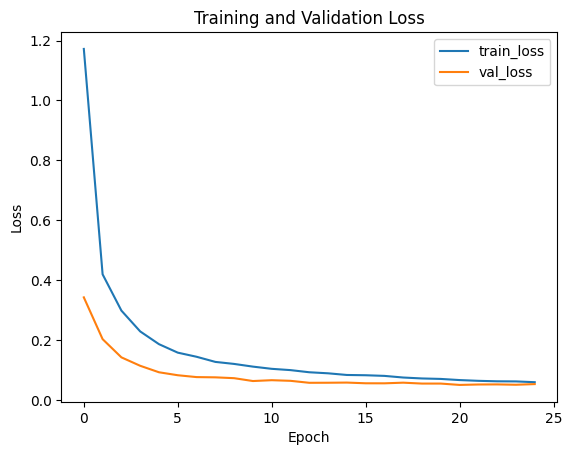

In [23]:
# Loss plot
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


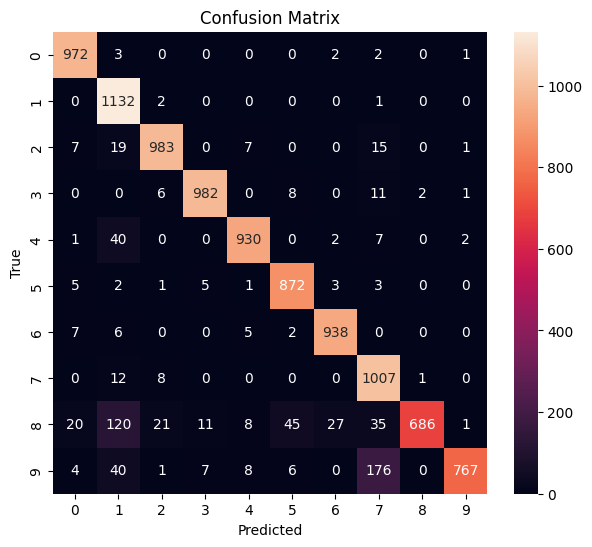

In [24]:
# Confusion matrix heatmap (optional: seaborn used here for readability)
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [25]:
# Show per-class metrics as a dataframe
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose().round(4)
print(report_df)

              precision  recall  f1-score     support
0                0.9567  0.9918    0.9739    980.0000
1                0.8239  0.9974    0.9024   1135.0000
2                0.9618  0.9525    0.9572   1032.0000
3                0.9771  0.9723    0.9747   1010.0000
4                0.9698  0.9470    0.9583    982.0000
5                0.9346  0.9776    0.9556    892.0000
6                0.9650  0.9791    0.9720    958.0000
7                0.8011  0.9796    0.8814   1028.0000
8                0.9956  0.7043    0.8250    974.0000
9                0.9922  0.7602    0.8608   1009.0000
accuracy         0.9269  0.9269    0.9269      0.9269
macro avg        0.9378  0.9262    0.9261  10000.0000
weighted avg     0.9357  0.9269    0.9254  10000.0000
